In [ ]:
# 폰트 설치 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (11.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122542 files and dir

In [ ]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
#구글 드라이브와 연동
from google.colab import drive
drive.mount('/content/gdrive')
directory_path = '/content/gdrive/MyDrive/Colab Notebooks/파이썬과 데이터분석/Project/project/'

Mounted at /content/gdrive


# 데이터 전처리

### 개봉일 형식 통일

In [ ]:
#tmp['개봉일']=tmp['개봉일'].str.replace('.','-')로 했는데, 한자리 숫자 앞에 0이 붙어있지 않는 문제 발생 ex.07이 아닌 7로 되어있음 
for j in range(5):
    tmp=pd.read_csv(directory_path+'df'+str(3+j)+'.csv', encoding='cp949')
    tmp.drop(columns='Unnamed: 0', inplace = True)
    lst=tmp.개봉일
    a=[]
    for data in lst:
        if type(data)!= float:
            date=data.split('.')
            for i in range(2):
                if len(date[i+1])==1:
                    date[i+1]='0'+date[i+1]
            data = date[0]+'-'+date[1]+'-'+date[2]
            a.append(data)
        else: a.append(data)
    tmp['개봉일']=a
    tmp.to_csv(directory_path+'df'+str(3+j)+'.csv', encoding = 'cp949') # 형식 통일한 데이터를 csv 파일로 저장

In [ ]:
# 데이터파일 병합 및 결측치 삭제

df=pd.DataFrame()
for i in range(3, 24):
    f = open(directory_path +'df'+str(i)+'.csv', 'rt', encoding = 'cp949')
    data = csv.reader(f, delimiter=',')
    header = next(data)
    lst=[]
    for row in data:
        for j in range(len(header)):
             if row[j]=='':
                row[j]=np.nan                                                                                  #dropna를 사용하기 위해 결측치 nan으로 채우기
        lst.append(row)
    f.close()
    tmp=pd.DataFrame(lst, columns=header)                                                                      #리스트로 저장된 데이터 dataframe 형식으로 변환
    df=pd.concat([df, tmp])                                                                                    # pd.concat() : 연도별 csv 파일 병합/ 참고자료 : https://western-sky.tistory.com/55 
df=df.reindex(columns=['순위','영화명','장르', '개봉일', '관객수', '대표국적', '등급', '감독', '배우','연도'])    # 사용할 컬럼만 재색인
# 오류 : df=df.dropna(inplace=True) 높은 순위의 애니이션이 배우에 결측치가 있어서 삭제됨, 이를 해결하고자 결측치가 있어도 되는 컬럼(대표국적, 등급, 감독, 배우)을 제외하고 dropna
df.dropna(subset=['순위','영화명','장르', '개봉일', '관객수','연도'],inplace=True)

### 관람가 명칭 통일

- 관람가 명칭 확인

error1 : 데이터타입이 섞여있어 if문 비교 안됨

astype(str) 변경

error2 : data == ('' or '' or ''...)인 경우 boolean으로 인식되어 변경 안됨

data == '' or data == ''으로 변경 (참고: https://arainablog.tistory.com/136)

In [ ]:
# 관람가 명칭 확인
df_grade = df["등급"].unique()

df_grade = df_grade.astype(str)
df_grade.sort()

In [ ]:
df_grade = np.array(df["등급"])
df_grade = df_grade.astype(str)

a=[]
for data in df_grade:
  # 청소년관람불가
  if (data=='18세관람가' or data=='18세관람가,15세이상관람가' or data=='18세관람가,청소년관람불가' or data=='고등학생이상관람가' or data=='연소자관람불가' or data=='18세 미만인 자는 관람할 수 없는 등급'
      or data=='15세이상관람가,미성년자관람불가'or data=='제한상영가'or data=='국민학생관람불가,청소년관람불가' or data == "청소년관람불가"
      or data=='15세이상관람가,18세 미만인 자는 관람할 수 없는 등급' or data=='미성년자관람불가' or data=='청소년관람불가,고등학생이상관람가' or data=='연소자관람불가,청소년관람불가'
      or data=='청소년관람불가,15세이상관람가' or data=='청소년관람불가,전체관람가' or data=='고등학생이상관람가,청소년관람불가' or data=='청소년관람불가,12세관람가'):
    data = '청소년관람불가'
    a.append(data)

  # 전체관람가
  elif (data=='모든 관람객이 관람할 수 있는 등급' or data == '모든 관람객이 관람할 수 있는 등급,전체관람가' or data =='미성년자관람가' or data =='연소자관람가' or data =='연소자관람가,전체관람가'):
    data = '전체관람가'
    a.append(data)

  # 12세이상관람가
  elif (data=="12세 미만인 자는 관람할 수 없는 등급" or data=='12세관람가' or data=='12세이상관람가' or data=='12세이상관람가,12세관람가' or 
        data=="12세이상관람가,국민학생관람불가" or data=='12세이상관람가,연소자관람가,전체관람가' or data=='12세이상관람가,전체관람가' or data=='12세이상관람가,중학생이상관람가' or
        data=='국민학생관람불가' or data=='전체관람가,중학생이상관람가' or data=='중학생이상관람가'):
    a.append('12세이상관람가')
          

  # 15세이상관람가
  elif (data=='12세이상관람가,15세 미만인 자는 관람할 수 없는 등급' or data=='12세이상관람가,15세이상관람가' or data=='12세이상관람가,고등학생이상관람가' or data=='12세이상관람가,국민학생관람불가,15세이상관람가' 
        or data=='15세 미만인 자는 관람할 수 없는 등급' or data=='15세 미만인 자는 관람할 수 없는 등급 ,15세이상관람가' or data=='15세관람가', '15세관람가,12세이상관람가' or data=='15세관람가,15세이상관람가' 
        or '15세이상관람가' or data=='15세이상관람가,전체관람가' or data=='15세이상관람가,중학생이상관람가' or data=='고등학생이상관람가' or data=='고등학생이상관람가,15세이상관람가' or data=='국민학생관람불가,15세이상관람가'
        or data=='연소자관람가,15세이상관람가' or data=='연소자관람불가,15세이상관람가'):
    a.append('15세이상관람가')

  else:
    a.append(data)

df_grade=a
# list(set(df_grade))

In [ ]:
df['등급'] = df_grade

### 장르 확인
- 성인물 drop

  df[df.str.contains]: 특정 문자열 포함하는 행을 새로운 데이터프레임으로 추출
  (참고: https://zephyrus1111.tistory.com/46)

  df[~df.str.contains]: 특정 문자열 포함하지 않는 행을 새로운 데이터프레임으로 추출 (참고: https://hyang2data.tistory.com/13)

In [ ]:
df_mid = df
df_mid = df_mid[~df_mid["장르"].str.contains("성인")]

In [ ]:
# 연도 정수 변환
df_mid['연도']=df_mid['연도'].astype(float)               # str -> int형으로 바로 안바뀜 (참고: https://velog.io/@lemontech119/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%97%90%EB%9F%AC-ValueError-invalid-literal-for-int-with-base-10-173.5)
df_mid['연도']=df_mid['연도'].astype(int)

df_mid.to_csv(directory_path + 'df_mid.csv')                # 중간파일 == df_mid.csv

<ipython-input-9-eb4d391c003a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mid['연도']=df_mid['연도'].astype(float)               # str -> int형으로 바로 안바뀜 (참고: https://velog.io/@lemontech119/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%97%90%EB%9F%AC-ValueError-invalid-literal-for-int-with-base-10-173.5)
<ipython-input-9-eb4d391c003a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mid['연도']=df_mid['연도'].astype(int)


### 장르별 박스오피스 순위 추이

- 장르별로 연도순 데이터프레임 생성
- for문으로 변수명 할당: globals()[{}.format()] (참고: https://axce.tistory.com/112)
- globals(): 현재 전역변수를 모두 딕셔너리 형태로 반환 
> [key:value]의 형태로, for문으로 변수를 만드는 동시에 값을 저장할 수 있음 (참고: https://congcoding.tistory.com/55)

In [ ]:
genres = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로/로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
           '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

genres_Eng = ['SF', 'family', 'concert', 'horror', 'etc', 'documentary', 'drama', 'romance', 'musical', 'mystery', 'criminal', 'history', 'western',
              'thriller', 'animation', 'action', 'adventure', 'war', 'comedy', 'fantasy']

# 장르별 도식화
df_SF = df_mid[df_mid["장르"].str.contains('SF')]
df_family = df_mid[df_mid["장르"].str.contains('가족')]
df_concert = df_mid[df_mid["장르"].str.contains('공연')]
df_horror = df_mid[df_mid["장르"].str.contains('공포')]
df_etc = df_mid[df_mid["장르"].str.contains('기타')]
df_documentary = df_mid[df_mid["장르"].str.contains('다큐멘터리')]
df_drama = df_mid[df_mid["장르"].str.contains('드라마')]
df_romance = df_mid[df_mid["장르"].str.contains('멜로/로맨스')]
df_musical = df_mid[df_mid["장르"].str.contains('뮤지컬')]
df_mystery = df_mid[df_mid["장르"].str.contains('미스터리')]
df_criminal = df_mid[df_mid["장르"].str.contains('범죄')]
df_history = df_mid[df_mid["장르"].str.contains('사극')]
df_western = df_mid[df_mid["장르"].str.contains('서부극')]
df_thriller = df_mid[df_mid["장르"].str.contains('스릴러')]
df_animation = df_mid[df_mid["장르"].str.contains('애니메이션')]
df_action = df_mid[df_mid["장르"].str.contains('액션')]
df_adventure = df_mid[df_mid["장르"].str.contains('어드벤처')]
df_war = df_mid[df_mid["장르"].str.contains('전쟁')]
df_comedy = df_mid[df_mid["장르"].str.contains('코미디')]
df_fantasy = df_mid[df_mid["장르"].str.contains('판타지')]


# 데이터 저장
for genre in genres_Eng:
  globals()['df_{}'.format(genre)].to_csv("/content/gdrive/MyDrive/Colab Notebooks/파이썬과 데이터분석/Project/project/df_" + genre + '.csv')

NameError: ignored

# 데이터 시각화

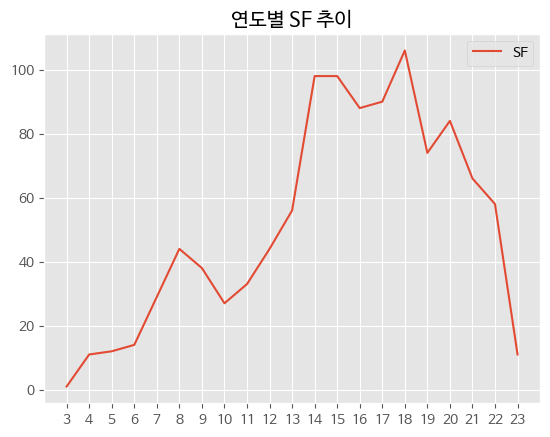

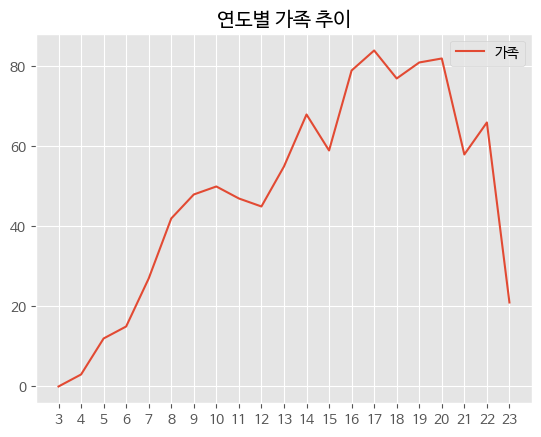

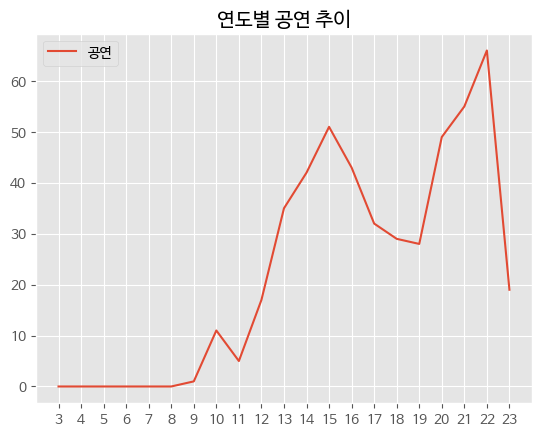

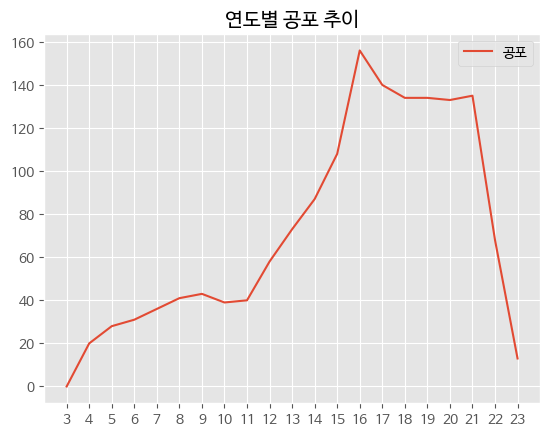

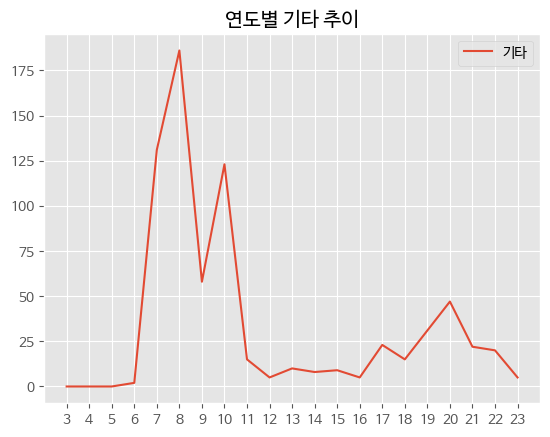

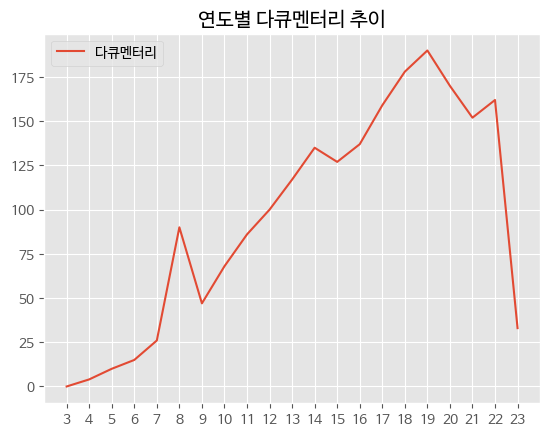

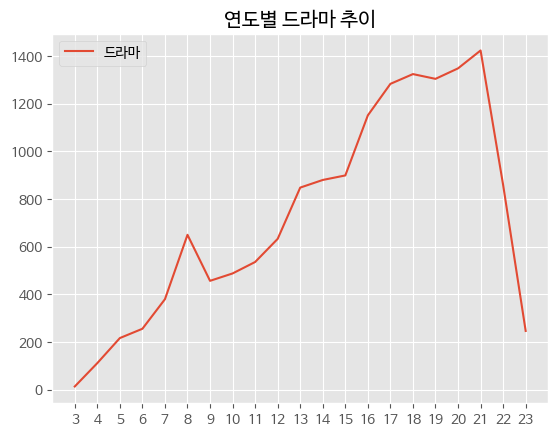

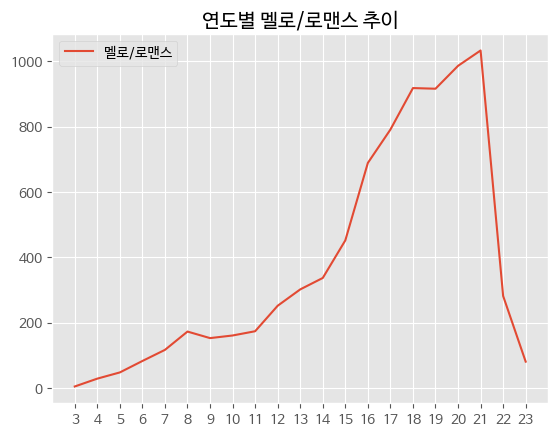

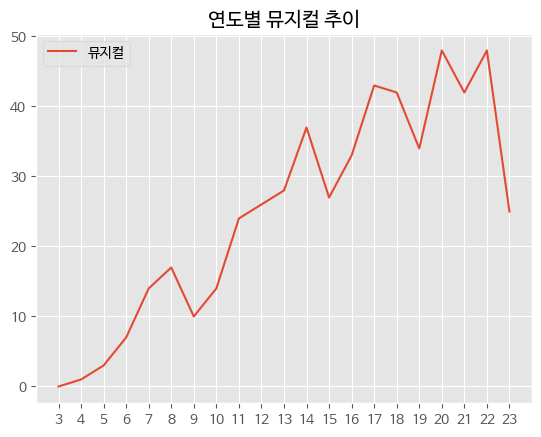

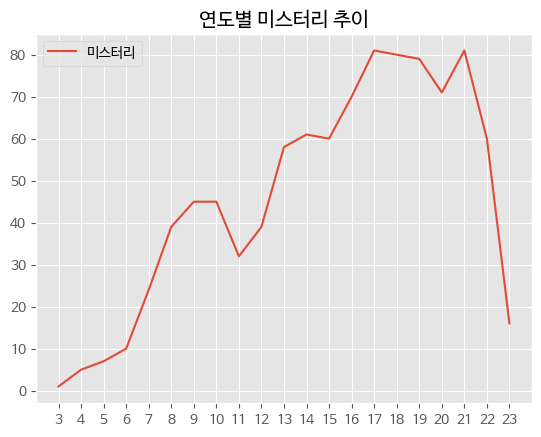

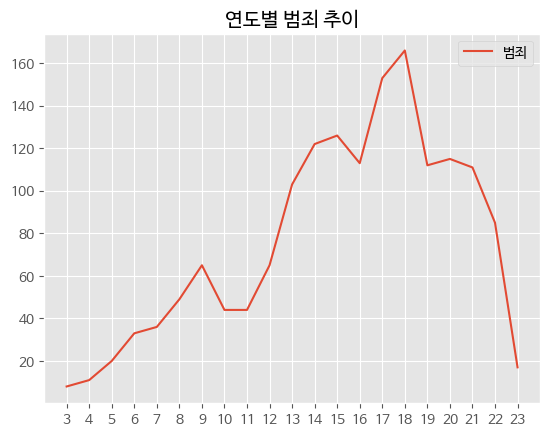

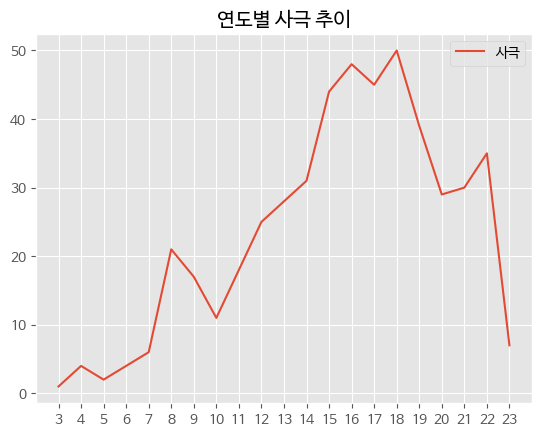

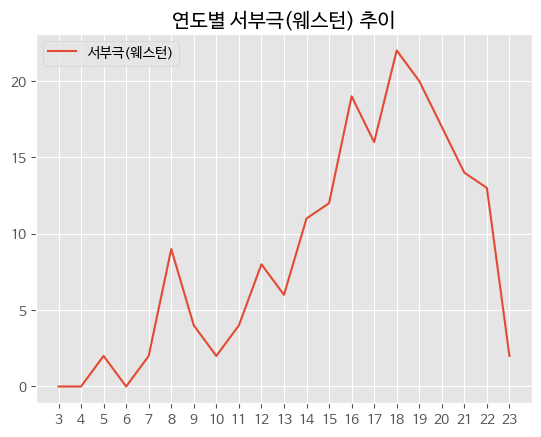

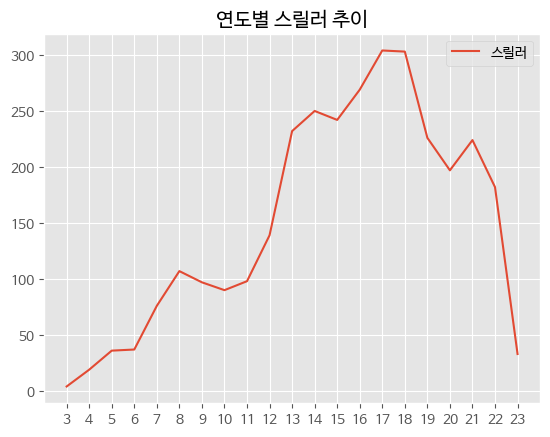

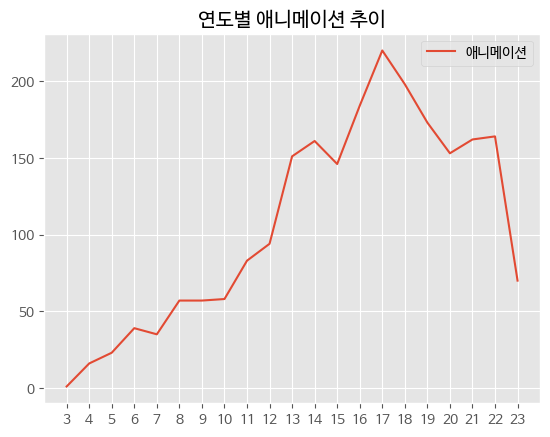

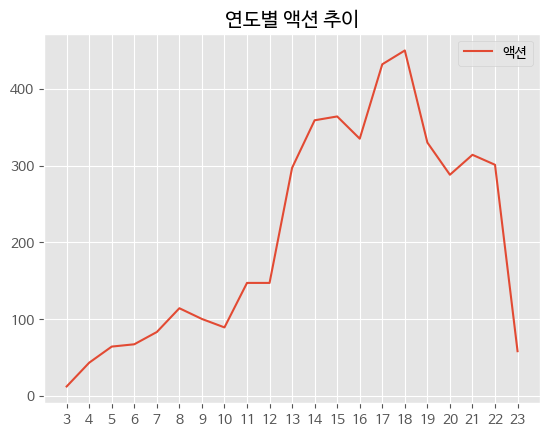

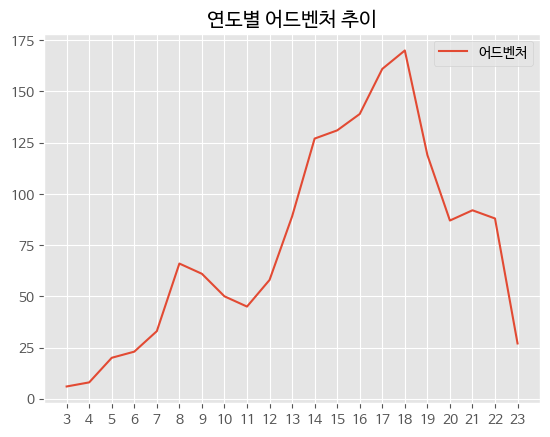

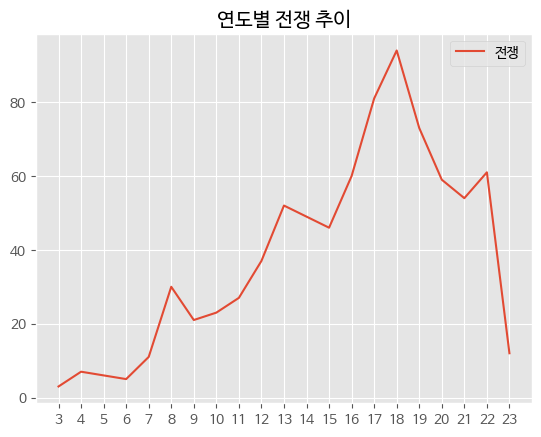

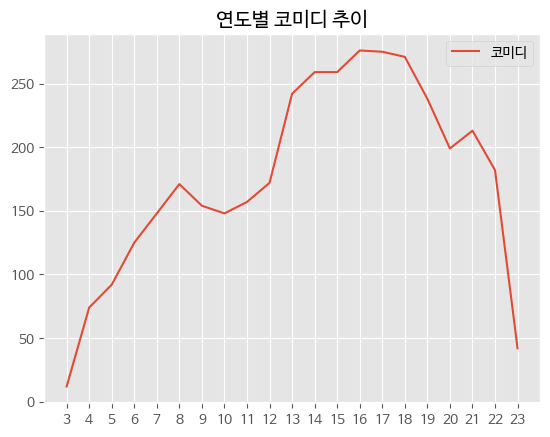

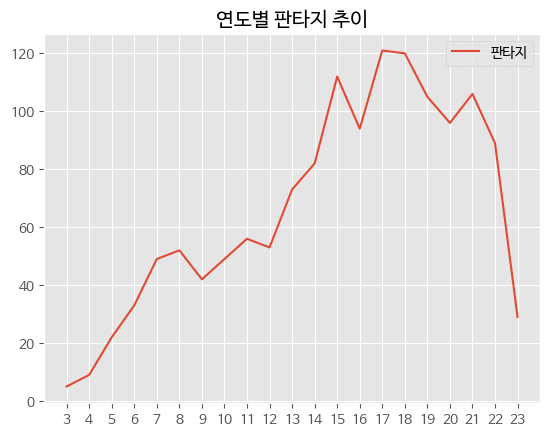

In [ ]:
plt.rc('font', family='NanumBarunGothic')

year = []

for i in range(2003, 2024):
  year.append(i)

num = [0] * 21


for i in range(20):
  f = open(directory_path + 'df_' + genres_Eng[i] + '.csv', 'r', encoding='utf8')
  data = csv.reader(f)
  next(data)

  num = [0]*21
  for row in data:
    for j in range(21):
      if(int(row[-1]) == 2003+j):
        num[j] += 1

  plt.title("연도별 " + genres[i]+ " 추이")
  plt.plot(year, num, label=genres[i])
  plt.legend()
  plt.xticks(range(2003, 2024), labels = [(x-2000) for x in year])
  plt.show()

- 전체 장르의 박스오피스 추이 출력

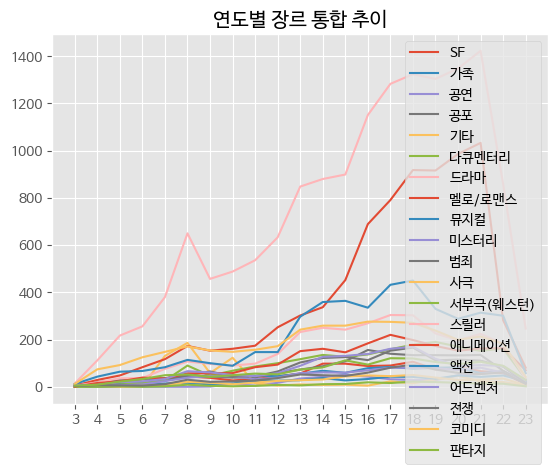

In [ ]:
num = [0]*21

for i in range(20):
  f = open(directory_path + 'df_' + genres_Eng[i] + '.csv', 'r', encoding='utf8')
  data = csv.reader(f)
  next(data)
  num = [0]*21
  for row in data:
    for j in range(21):
      if(int(row[-1]) == 2003+j):
        num[j] += 1

  plt.title("연도별 장르 통합 추이")
  plt.plot(year, num, label=genres[i])
  plt.legend()
  plt.xticks(range(2003, 2024), labels = [(x-2000) for x in year])
plt.show()


# 장르 개수가 너무 많아서 Top5로 비교

### 연도별 장르 비율 (파이차트)
- 문제1. 연도별로 총 영화 수의 차이가 커서 비교가 효과적이지 않음
- 문제2. 장르 수가 너무 많아서 그래프가 한눈에 잘 안보임

- 해결: 가장 개수가 많은 장르 top5를 파악하고, 파이차트를 활용해 비율로 나타내고자 함

### 문제: unnamed:0
1. 이유: csv 파일에 저장할 때 index도 같이 저장되는데, 컬럼명이 없는 경우에는 unnamed:0으로 같이 저장됨 (참고: http://datahwi.tistory.com/96)
2. 해결: read_csv에 index_col = 0 추가

- 연도별 박스오피스 영화 갯수

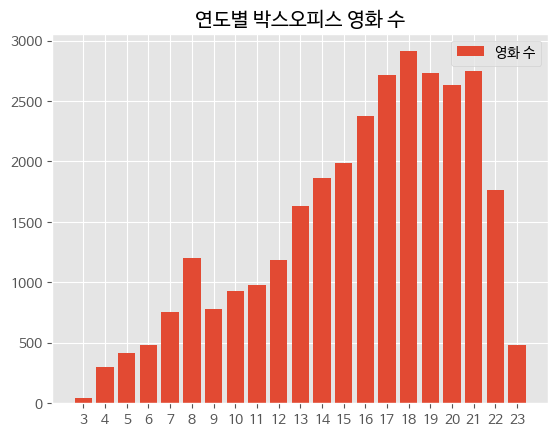

In [ ]:
plt.rc('font', family='NanumBarunGothic')

year = []

for i in range(2003, 2024):
  year.append(i)

f = open(directory_path + 'df_mid.csv', 'r', encoding='utf8')
data = csv.reader(f)
next(data)

# 연도별 영화 개수

year_mv_num = [0] * 21

for row in data:
  for i in range(21):
    if(int(row[-1]) == 2003+i):
      year_mv_num[i] += 1

plt.title("연도별 박스오피스 영화 수")
plt.bar(year, year_mv_num, label="영화 수")

plt.legend()
plt.xticks(range(2003, 2024), labels = [(x-2000) for x in year])
plt.show()

- 결론: 연도의 이벤트와 장르 간 변화 추이가 유의미한 상관관계를 보인다기 보다는,

박스오피스에 랭크된 영화가 가장 많았던 2018년 부근에서 대부분의 장르가 최댓값을 갖는 추이를 가졌다.

### 장르별 개수 파악하기

- numpy array에 장르별 영화 개수 저장
- series로 장르명 = 인덱스화
- sort_values(ascending = False): 값을 기준으로 series 객체 내림차순 정렬 (참고: https://truman.tistory.com/90)
- 최댓값 5개만 잘라서 numpy array에 보관

In [ ]:
# 장르별 개수 파악하기
# print(len(df_comedy))

genre_top5 = np.empty(shape = len(genres_Eng))

for i in range(len(genres_Eng)):
  genre_top5[i] = len(pd.read_csv(directory_path + 'df_' + genres_Eng[i] + '.csv', encoding = 'utf8', index_col=0))

# 총 영화 개수
all_genres = int(len(df_mid))
print("총 영화 개수: ", all_genres)

# series 객체로 장르, 개수 저장하고 내림차순 정렬해 top5 알아보기
genre_series = pd.Series(genre_top5, index = genres_Eng, dtype = int)
genre_series = genre_series.sort_values(ascending = False)
print(genre_series)

# top5의 장르(=인덱스)를 리스트로 저장
genre_name_top5 = genre_series.index[0:5]
print(genre_name_top5)

# top5의 개수를 numpy array로 저장
genre_num_top5 = np.array(genre_series[0:5])
print(genre_num_top5)

총 영화 개수:  30898
drama          15309
romance         7982
action          4394
comedy          3709
thriller        3165
animation       2245
documentary     2006
adventure       1600
criminal        1598
horror          1517
fantasy         1397
SF              1082
family          1019
mystery          964
war              811
etc              715
musical          523
history          495
concert          483
western          183
dtype: int64
Index(['drama', 'romance', 'action', 'comedy', 'thriller'], dtype='object')
[15309  7982  4394  3709  3165]


- top5내의 비율을 파이차트로 확인하기
- 시각화 제목을 위해서 top5 한글명을 리스트로 저장

In [ ]:
genre_name_top5_kor = ["드라마", "멜로/로맨스", "액션", "코미디", "스릴러"]

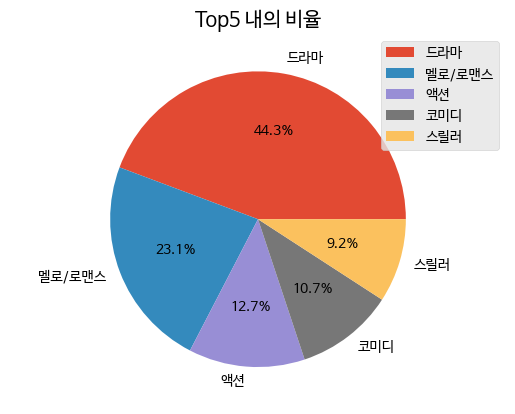

In [ ]:
plt.title("Top5 내의 비율")
plt.axis('equal')
plt.pie(genre_num_top5, labels = genre_name_top5_kor, autopct = '%.1f%%')
plt.legend()
plt.show()

- Top5 장르만 연도별 추이 출력

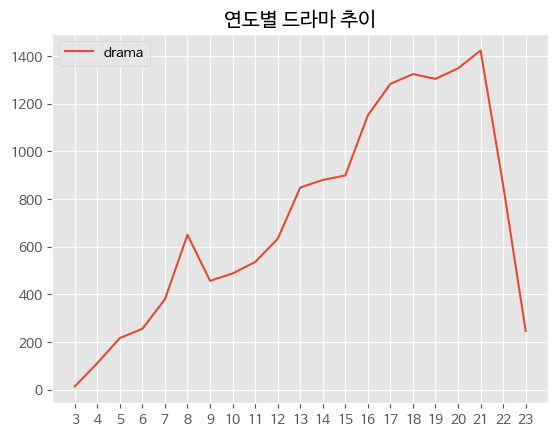

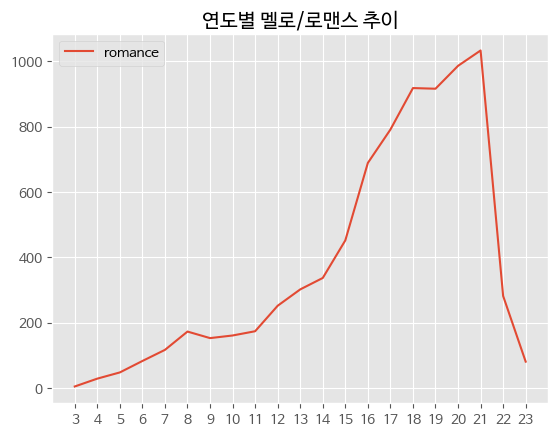

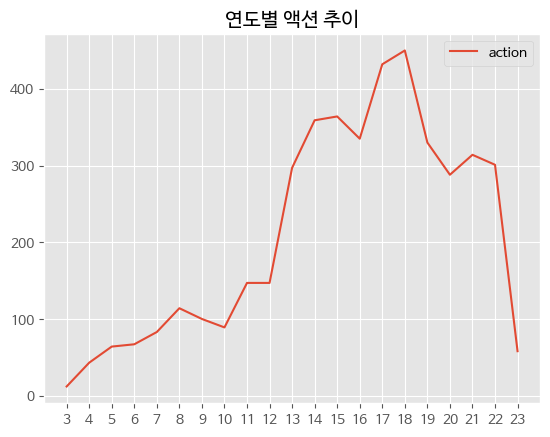

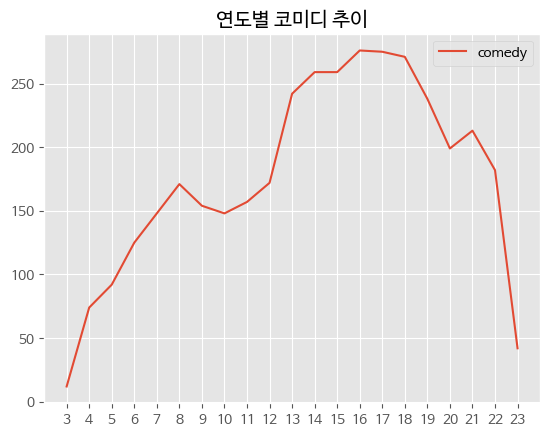

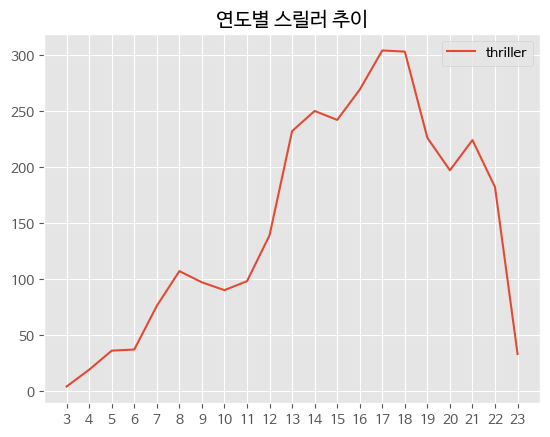

In [ ]:
year = []

for i in range(2003, 2024):
  year.append(i)


for i in range(len(genre_name_top5)):
  f = open(directory_path + 'df_' + genre_name_top5[i] + '.csv', 'r', encoding='utf8')
  data = csv.reader(f)
  next(data)

  num = [0]*21
  for row in data:
    for j in range(21):
      if(int(row[-1]) == 2003+j):
        num[j] += 1

  plt.title("연도별 " + genre_name_top5_kor[i]+ " 추이")
  plt.plot(year, num, label=genre_name_top5[i])
  plt.legend()
  plt.xticks(range(2003, 2024), labels = [(x-2000) for x in year])
  plt.show()

- Top5의 통합 추이 출력

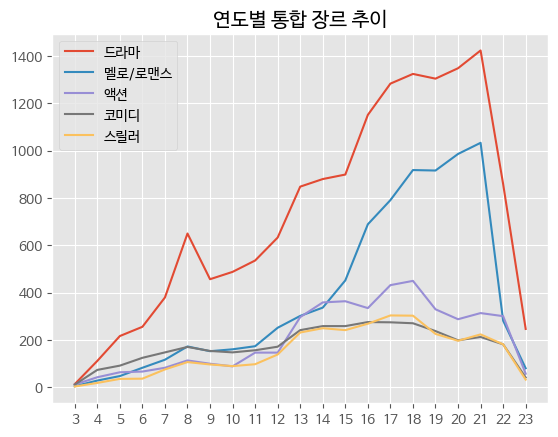

In [ ]:
year = []

for i in range(2003, 2024):
  year.append(i)

for i in range(len(genre_name_top5)):
  f = open(directory_path + 'df_' + genre_name_top5[i] + '.csv', 'r', encoding='utf8')
  data = csv.reader(f)
  next(data)

  num = [0]*21
  for row in data:
    for j in range(21):
      if(int(row[-1]) == 2003+j):
        num[j] += 1
  plt.title("연도별 통합 장르 추이")
  plt.plot(year, num, label=genre_name_top5_kor[i])
  plt.legend()
  plt.xticks(range(2003, 2024), labels = [(x-2000) for x in year])

plt.show()

- 드라마만 유독 높게 나타나는 이유?

문제: 범용적인 특징이 있어서 다른 장르와 많이 결합해서 쓰이기 때문은 아닐까?

해결: 혼자 쓰이는 경우, 다른 장르와 결합해서 쓰이는 경우를 top5 내의 다른 장르와 비교하고자 함

- 장르 데이터만 구분해서 sol_coup에 저장하기

In [ ]:
# 0으로 채워진 데이터프레임 만들기
sol_coup_np = np.zeros((5, 2), dtype=int)

sol_coup = pd.DataFrame(sol_coup_np, index = genre_name_top5, columns = ['sol', 'coupled'])

series_for_drama = df_mid["장르"].str.split(",")

# print(series_for_drama.iloc[0])
# print(len(series_for_drama.iloc[0]))

for i in range(len(series_for_drama)):
  if ("드라마" in series_for_drama.iloc[i]):
    if (len(series_for_drama.iloc[i]) == 1):
      sol_coup_np[0, 0] += 1
    
    else:
      sol_coup_np[0, 1] += 1
  
  if ("멜로/로맨스" in series_for_drama.iloc[i]):
    if (len(series_for_drama.iloc[i]) == 1):
      sol_coup_np[1, 0] += 1
    
    else:
      sol_coup_np[1, 1] += 1
  
  if ("액션" in series_for_drama.iloc[i]):
    if (len(series_for_drama.iloc[i]) == 1):
      sol_coup_np[2, 0] += 1
    
    else:
      sol_coup_np[2, 1] += 1
  
  if ("코미디" in series_for_drama.iloc[i]):
    if (len(series_for_drama.iloc[i]) == 1):
      sol_coup_np[3, 0] += 1
    
    else:
      sol_coup_np[3, 1] += 1
  
  if ("스릴러" in series_for_drama.iloc[i]):
    if (len(series_for_drama.iloc[i]) == 1):
      sol_coup_np[4, 0] += 1
    
    else:
      sol_coup_np[4, 1] += 1

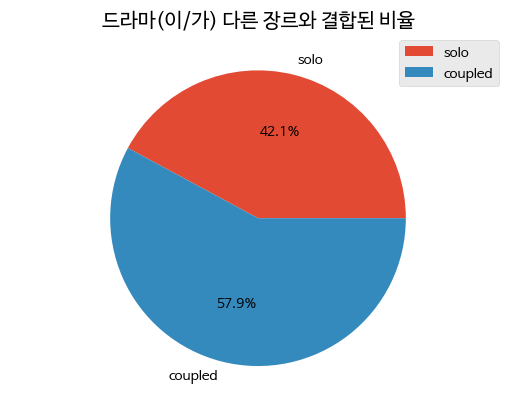

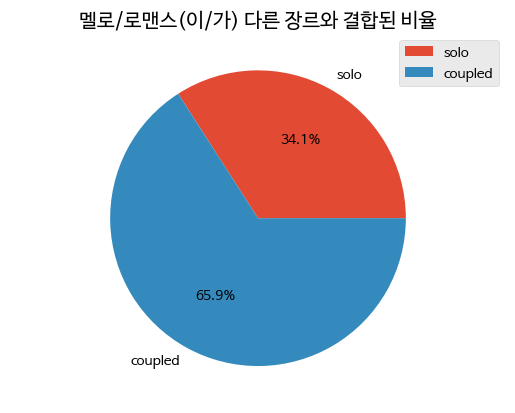

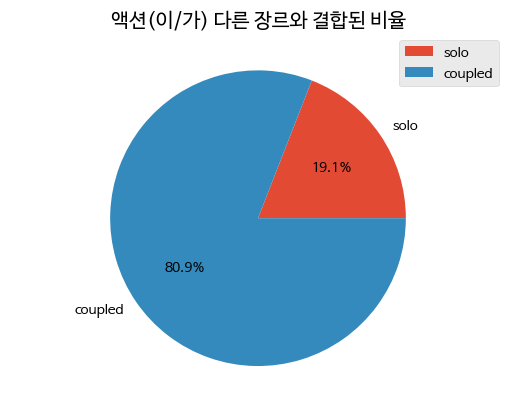

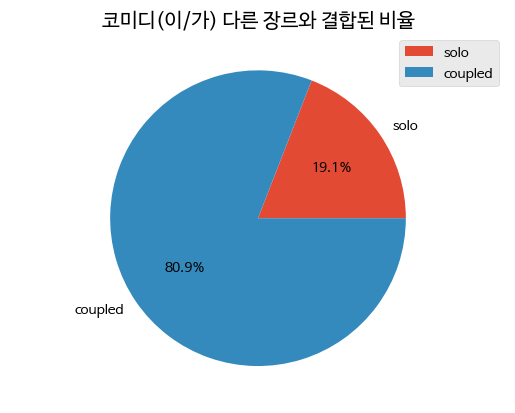

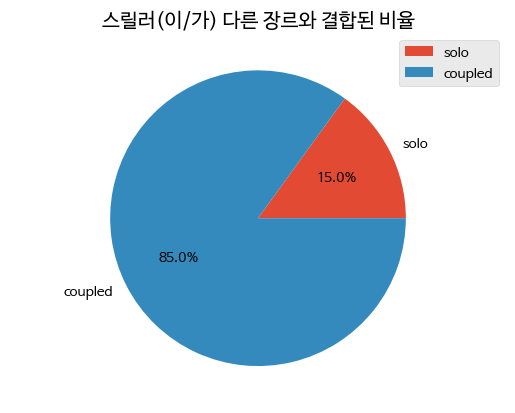

In [ ]:
for i in range(len(sol_coup)):
  plt.title(genre_name_top5_kor[i] + "(이/가) 다른 장르와 결합된 비율")
  plt.axis('equal')
  plt.pie(sol_coup.iloc[i], labels = ["solo", "coupled"], autopct = "%.1f%%")
  plt.legend()
  plt.show()

- 결론: 드라마는 다른 장르와 결합된 것보다 오히려 혼자 있는(?)게 훨씬 많음 (순수하게 개수가 많은 것)

# 추천시스템

- 선호, 불호 장르 결합율 및 필터링
- favor에 따라 두 장르가 결합된 영화 순위를 보여주거나, 불호 장르를 필터링할 수 있음

- tabulate 라이브러리: 데이터프레임 깔끔하게 나타내기 (참고: https://cosmosproject.tistory.com/395)

======================================= 장르 필터링 추천시스템에 오신 것을 환영합니다! =======================================


저희 장르 필터링 영화 추천 시스템의 순서는 다음과 같습니다.

1. 가장 선호하는 장르A 선택

2. 두번째 장르의 선호 or 불호 선택
- 선호를 선택한 경우, 가장 선호하는 장르A와 두번째로 선호하는 장르B가 결합된 영화를 추천해드립니다.
- 불호를 선택한 경우, 가장 선호하는 장르A에서 불호하는 장르B를 제외한 영화를 추천해드립니다.

3.선호 or 불호하는 장르B 선택

4-1. 선택한 장르A와 장르B의 결합(불호를 선택한 경우 장르A에서 장르B가 제외된) 비율 정보 제공
4-2. 장르A와 장르B가 결합된(불호를 선택한 경우 장르A에서 장르B가 제외된) 영화 수의 연도별 추이 정보 제공

5. 추천 받을 영화의 박스오피스 기간 선택

6. 선택한 장르와 연도를 반영한 관객수 기준 상위 10개의 영화 추천

순서로 진행됩니다. 이용에 참고하시기 바랍니다.

======================================= 이제 추천을 시작합니다! =======================================


1 : SF
2 : 가족
3 : 공연
4 : 공포(호러)
5 : 기타
6 : 다큐멘터리
7 : 드라마
8 : 멜로/로맨스
9 : 뮤지컬
10 : 미스터리
11 : 범죄
12 : 사극
13 : 서부극(웨스턴)
14 : 스릴러
15 : 애니메이션
16 : 액션
17 : 어드벤처
18 : 전쟁
19 : 코미디
20 : 판타지

가장 선호하는 장르의 번호를 입력하세요: 14

이제 두 번째 장르를 선택합니다. 우선 선호, 불호 중 하나를 선택해주세요.

선호: 1, 불호 2 중 번호 하나를 입력하세요.: 2

불호하는 장르의 번호를 입력하세요: 4


======================================= 가장 선호하는 장르: 스릴

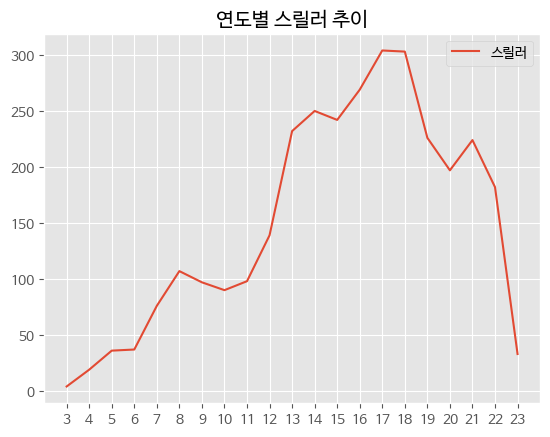



======================================= 가장 선호하는 장르: 스릴러가 다른 장르와 결합된 비율입니다. =======================================




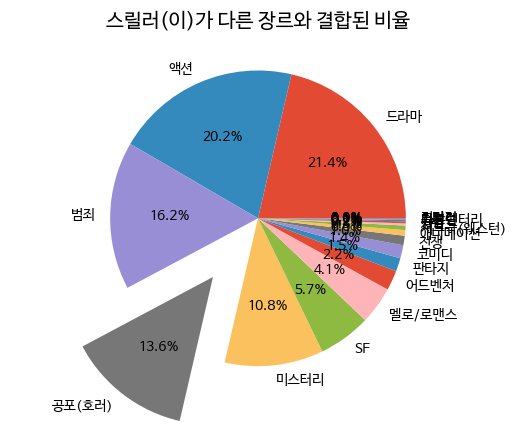



================= 스릴러 장르와 결합된 장르 중에서 공포(호러) 장르와 결합된 영화의 비율은 13.6 % 입니다. =================




======================================= 가장 선호하는 장르: 스릴러에서 공포(을)를 제외한 비율입니다. =======================================




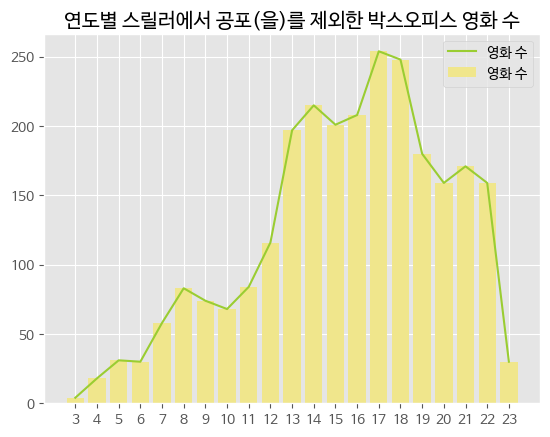


\======================================= 스릴러에서 공포(이)가 제외된 영화 수가 가장 많은 연도는?=======================================

2017 년
영화 개수: 254 개 입니다. 

기간별 필터링을 진행할까요? (1:네, 2:아니요 번호 입력): 1

시작 연도를 입력해주세요 (ex.2023): 2016

종료 연도를 입력해주세요 (ex.2023): 2023


======================================= 이제 추천을 시작합니다. =======================================


======================================= 관객수 기준 상위 10개의 영화목록입니다. =======================================

  박스오피스연도    박스오피스순위  영화명                    장르                     개봉일        관객수  대표국적    등급            감독                 배우
----------------  ----------------  ------------------------  -----------------------  ----------  --------  ----------  --------------  -------------------  ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
from tabulate import tabulate

df_mid = pd.read_csv(directory_path + "df_mid.csv", encoding = "utf8", index_col = 0)

genres = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로/로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
           '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

genres_Eng = ['SF', 'family', 'concert', 'horror', 'etc', 'documentary', 'drama', 'romance', 'musical', 'mystery', 'criminal', 'history', 'western',
              'thriller', 'animation', 'action', 'adventure', 'war', 'comedy', 'fantasy']

# 장르별 도식화
df_SF = df_mid[df_mid["장르"].str.contains('SF')]
df_family = df_mid[df_mid["장르"].str.contains('가족')]
df_concert = df_mid[df_mid["장르"].str.contains('공연')]
df_horror = df_mid[df_mid["장르"].str.contains('공포')]
df_etc = df_mid[df_mid["장르"].str.contains('기타')]
df_documentary = df_mid[df_mid["장르"].str.contains('다큐멘터리')]
df_drama = df_mid[df_mid["장르"].str.contains('드라마')]
df_romance = df_mid[df_mid["장르"].str.contains('멜로/로맨스')]
df_musical = df_mid[df_mid["장르"].str.contains('뮤지컬')]
df_mystery = df_mid[df_mid["장르"].str.contains('미스터리')]
df_criminal = df_mid[df_mid["장르"].str.contains('범죄')]
df_history = df_mid[df_mid["장르"].str.contains('사극')]
df_western = df_mid[df_mid["장르"].str.contains('서부극')]
df_thriller = df_mid[df_mid["장르"].str.contains('스릴러')]
df_animation = df_mid[df_mid["장르"].str.contains('애니메이션')]
df_action = df_mid[df_mid["장르"].str.contains('액션')]
df_adventure = df_mid[df_mid["장르"].str.contains('어드벤처')]
df_war = df_mid[df_mid["장르"].str.contains('전쟁')]
df_comedy = df_mid[df_mid["장르"].str.contains('코미디')]
df_fantasy = df_mid[df_mid["장르"].str.contains('판타지')]

# 데이터프레임 -> csv 저장
for genre in genres_Eng:
  globals()['df_{}'.format(genre)].to_csv("/content/gdrive/MyDrive/Colab Notebooks/파이썬과 데이터분석/Project/project/df_" + genre + '.csv')

#선호하는 장르의 연도별 추이 그래프 함수정의
def g(i):
    year = []
    for j in range(2003, 2024):
        year.append(j)

    num = [0] * 21
    f = open(directory_path + 'df_' + genres_Eng[i] 
    + '.csv', 'r', encoding='utf8')
    data = csv.reader(f)
    next(data)

    for row in data:
      for j in range(21):
        if(int(row[-1]) == 2003+j):
          num[j] += 1
    plt.rc('font', family='NanumBarunGothic')
    plt.title("연도별 " + genres[i]+ " 추이")
    plt.plot(year, num, label=genres[i])
    plt.legend()
    plt.xticks(range(2003, 2024), labels = [(x-2000) for x in year])
    plt.show()

# 추천시스템 선호 장르 혹은, 싫어하는 장르 필터링

print("======================================= 장르 필터링 추천시스템에 오신 것을 환영합니다! =======================================\n\n")
print("저희 장르 필터링 영화 추천 시스템의 순서는 다음과 같습니다.\n")
print("1. 가장 선호하는 장르A 선택\n")
print("2. 두번째 장르의 선호 or 불호 선택")
print("- 선호를 선택한 경우, 가장 선호하는 장르A와 두번째로 선호하는 장르B가 결합된 영화를 추천해드립니다.")
print("- 불호를 선택한 경우, 가장 선호하는 장르A에서 불호하는 장르B를 제외한 영화를 추천해드립니다.\n")
print("3.선호 or 불호하는 장르B 선택\n")
print("4-1. 선택한 장르A와 장르B의 결합(불호를 선택한 경우 장르A에서 장르B가 제외된) 비율 정보 제공")
print("4-2. 장르A와 장르B가 결합된(불호를 선택한 경우 장르A에서 장르B가 제외된) 영화 수의 연도별 추이 정보 제공\n")
print("5. 추천 받을 영화의 박스오피스 기간 선택\n")
print("6. 선택한 장르와 연도를 반영한 관객수 기준 상위 10개의 영화 추천\n")
print("순서로 진행됩니다. 이용에 참고하시기 바랍니다.\n")
print("======================================= 이제 추천을 시작합니다! =======================================\n\n")

for i in range(len(genres)):
  print(i+1, ":", genres[i])

genre1 = int(input("\n가장 선호하는 장르의 번호를 입력하세요: ")) - 1



#불호 또는 선호2 장르 입력 받기
print("\n이제 두 번째 장르를 선택합니다. 우선 선호, 불호 중 하나를 선택해주세요.")
favor = int(input("\n선호: 1, 불호 2 중 번호 하나를 입력하세요.: "))
if favor == 1:
  genre2 = int(input("\n선호하는 장르의 번호를 입력하세요: ")) - 1
else:
  genre2 = int(input("\n불호하는 장르의 번호를 입력하세요: ")) - 1

# 가장 선호하는 장르 연도별 추이 출력
print('\n\n======================================= 가장 선호하는 장르: '+genres[genre1]+'의 연도별 영화 수 추이 입니다. =======================================\n\n')
g(genre1)


# 가장 선호하는 장르와 다른 장르의 결합 비율 그래프 출력
print('\n\n======================================= 가장 선호하는 장르: '+genres[genre1]+'가 다른 장르와 결합된 비율입니다. =======================================\n\n')
df_combine = pd.read_csv(directory_path + "df_" + genres_Eng[genre1] + ".csv", encoding = "utf8", index_col = 0)
series_combine = df_combine["장르"].str.split(",")
np_combine = np.zeros(shape = len(genres))

for i in range(len(series_combine)):
  for j in range(len(genres)):
    if (len(series_combine.iloc[i]) == 1):
      np_combine[genre1] = 0

    else:
      if (genres[j] in series_combine.iloc[i]) and (genre1 != j):
        np_combine[j] += 1
np_combine = np_combine.astype(int)        
s_np_combine = pd.Series(np_combine, index = genres)
s_np_combine = s_np_combine.sort_values(ascending = False)

# explode 정의
np_explode = np.zeros(shape = len(genres))

for i in range(len(s_np_combine)):
  if (genres[genre2] == s_np_combine.index[i]):
    np_explode[i] = 0.5
  
  else:
    np_explode[i] = 0

# 장르가 20개라 legend 보기 불편해서 뺌

plt.title(genres[genre1] + "(이)가 다른 장르와 결합된 비율")
plt.axis("equal")
plt.pie(s_np_combine, labels = s_np_combine.index,explode = (tuple(np_explode)), autopct = "%.1f%%")
plt.show()

# 출력용 rate
rate = (np_combine[genre2] / sum(np_combine)) * 100
print("\n\n=================", genres[genre1], "장르와 결합된 장르 중에서", genres[genre2], "장르와 결합된 영화의 비율은", "{:.1f}".format(rate), "% 입니다. =================\n\n")


  
# 공포(호러) -> 공포로 변경
if (genre2 == 3):
  genres[genre2] = "공포"

#선호/불호하는 장르에 따른 필터링
if favor == 1:
    df_filter = pd.read_csv(directory_path + 'df_' + genres_Eng[genre1] + '.csv', encoding='utf8', index_col = 0) 
    df_filter = df_filter[df_filter['장르'].str.contains(genres[genre2])] 
else:
    df_filter = pd.read_csv(directory_path + 'df_' + genres_Eng[genre1] + '.csv', encoding='utf8', index_col = 0)
    df_filter = df_filter[~df_filter['장르'].str.contains(genres[genre2])]

# 연도별 결합 장르의 영화 수

year = []

for i in range(2003, 2024):
  year.append(i)
  
year_mv_num = np.zeros(shape = 21)
year_mv_num = year_mv_num.astype(int)

for i in range(len(df_filter)):
  for j in range(21):
    if(int(df_filter["연도"].iloc[i]) == 2003+j):
      year_mv_num[j] += 1

if favor == 1:
  print('\n\n======================================= 가장 선호하는 장르: '+genres[genre1]+'(와)과 ' + genres[genre2] + '(이)가 결합된 비율입니다. =======================================\n\n')
  plt.title("연도별 " + genres[genre1] + "(와)과 " + genres[genre2] + "(이)가 결합된 박스오피스 영화 수")
else:
  print('\n\n======================================= 가장 선호하는 장르: '+genres[genre1]+'에서 ' + genres[genre2] + '(을)를 제외한 비율입니다. =======================================\n\n')
  plt.title("연도별 " + genres[genre1] + "에서 " + genres[genre2] + "(을)를 제외한 박스오피스 영화 수")

plt.bar(year, year_mv_num, label="영화 수", color = 'khaki')
plt.plot(year, year_mv_num, label="영화 수", color = 'yellowgreen')
plt.legend()
plt.xticks(range(2003, 2024), labels = [(x-2000) for x in year])
plt.show()

# 어느 해에 두 장르가 결합된(혹은 제외된) 영화가 박스오피스 순위에 많이 랭크되었을까?
if favor == 1:
  print("\n\n=======================================", genres[genre1] + "(와)과 " + genres[genre2] + "(이)가 가장 많이 결합된 연도는?=======================================\n")
else:
  print("\n\=======================================", genres[genre1] + "에서 " + genres[genre2] + "(이)가 제외된 영화 수가 가장 많은 연도는?=======================================\n")
print((np.argmax(year_mv_num) + 2003), "년\n영화 개수:", np.max(year_mv_num), "개 입니다. \n")

# 기간별 필터링 진행
term_filtering = int(input("기간별 필터링을 진행할까요? (1:네, 2:아니요 번호 입력): "))
if term_filtering == 1:
  term_start = int(input("\n시작 연도를 입력해주세요 (ex.2023): "))
  term_fin = int(input("\n종료 연도를 입력해주세요 (ex.2023): "))
  
  df_filter = df_filter[(df_filter["연도"] >= term_start) & (df_filter["연도"] <= term_fin)].copy()


# 관객수 기준 top10 출력
df_filter['관객수'].replace(',','',inplace=True, regex=True)    # 참고: https://hyang2data.tistory.com/94
df_filter['관객수']=df_filter['관객수'].astype(int)
df_filter=df_filter.sort_values('관객수', ascending=False) 
df_filter.rename(columns={'순위':'박스오피스순위','연도':'박스오피스연도'},inplace=True) # 참고: https://clolee.tistory.com/20
df_filter=df_filter.reindex(columns=['박스오피스연도','박스오피스순위','영화명','장르', '개봉일', '관객수', '대표국적', '등급', '감독', '배우',])  

print('\n\n======================================= 이제 추천을 시작합니다. =======================================')
# top10까지 없는 경우
if (len(df_filter) == 0):
  print("\n\n======================================= 추천할 수 있는 영화가 없습니다! 다음에 다시 이용해주세요. =======================================\n")

elif (len(df_filter) < 10):
  print("\n\n======================================= 관객수 기준 상위", len(df_filter), "개 의 영화목록입니다. =======================================\n")
  df_filter.index=np.arange(1,len(df_filter)+1)
  print(tabulate(df_filter, headers='keys', tablefmt='fancygrid', showindex=False))
  print('\n\n======================================= 영화 추천이 완료되었습니다. 저희 프로그램을 이용해주셔서 감사합니다. =======================================\n')

else:
  print('\n\n======================================= 관객수 기준 상위 10개의 영화목록입니다. =======================================\n')
  df_filter_rank = df_filter[:10].copy()
  df_filter_rank.index=np.arange(1,11)

  print(tabulate(df_filter_rank, headers='keys', tablefmt='fancygrid', showindex=False))
  print('\n\n======================================= 영화 추천이 완료되었습니다. 저희 프로그램을 이용해주셔서 감사합니다. =======================================\n')

# A value is trying to be set on a copy of a slice from a DataFrame - copy 사용 (변경된 df_filter_rank가 메모리를 따로 사용하도록 함)
# 참고: https://emilkwak.github.io/pandas-dataframe-settingwithcopywarning
# 파생된 열(df_filter_rank)를 변경하려고 할 때, 원래 df_filter과 메모리공간을 공유해서 사용하고 있기 때문에,
# 기존의 df_filter도 같이 변경해야 할지 물어보는 오류라서 .copy()로 공간을 따로 지정해야 함

In [ ]:
]